In [0]:
from sklearn import model_selection
from keras import Sequential
from keras import datasets
from keras.layers import *
from keras.models import *
from keras.optimizers import Adam
from keras import losses
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# !unzip drive/My\ Drive/dataset_ispravka.zip -d .

In [0]:
X = np.load('dataset_ispravka/dataset_x_ispravka.npy')
Y = np.load('dataset_ispravka/dataset_y_ispravka.npy')

George W Bush


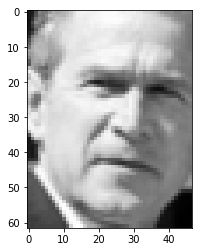

In [32]:
index = 23

plt.imshow(X[index], cmap = 'gray')
print(Y[index])

In [33]:
a, b = np.unique(Y, return_counts=True)
counts = dict(zip(a, b))

for item in counts:
    print(item, counts[item])

Alejandro Toledo 39
Alvaro Uribe 35
Amelie Mauresmo 21
Andre Agassi 36
Angelina Jolie 20
Ariel Sharon 77
Arnold Schwarzenegger 42
Atal Bihari Vajpayee 24
Bill Clinton 29
Carlos Menem 21
Colin Powell 236
David Beckham 31
Donald Rumsfeld 121
George Robertson 22
George W Bush 530
Gerhard Schroeder 109
Gloria Macapagal Arroyo 44
Gray Davis 26
Guillermo Coria 30
Hamid Karzai 22
Hans Blix 39
Hugo Chavez 71
Igor Ivanov 20
Jack Straw 28
Jacques Chirac 52
Jean Chretien 55
Jennifer Aniston 21
Jennifer Capriati 42
Jennifer Lopez 21
Jeremy Greenstock 24
Jiang Zemin 20
John Ashcroft 53
John Negroponte 31
Jose Maria Aznar 23
Juan Carlos Ferrero 28
Junichiro Koizumi 60
Kofi Annan 32
Laura Bush 41
Lindsay Davenport 22
Lleyton Hewitt 41
Luiz Inacio Lula da Silva 48
Mahmoud Abbas 29
Megawati Sukarnoputri 33
Michael Bloomberg 20
Naomi Watts 22
Nestor Kirchner 37
Paul Bremer 20
Pete Sampras 22
Recep Tayyip Erdogan 30
Ricardo Lagos 27
Roh Moo-hyun 32
Rudolph Giuliani 26
Saddam Hussein 23
Serena Williams 52

In [0]:
persons = dict(zip(np.unique(Y), enumerate(np.unique(Y))))

In [0]:
for i in range(len(Y)):
    Y[i] = persons[Y[i]][0]

In [36]:
print(Y)

['61' '25' '9' ... '14' '15' '14']


In [0]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size = 0.33, stratify = Y)

([array([ 0.,  0., 62.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 0.,  0., 62.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 0.,  0., 60.,  2.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 0.,  0., 56.,  5.,  1.,  0.,  0.,  0.,  0.,  0.]),
  array([ 0.,  0., 47., 10.,  4.,  1.,  0.,  0.,  0.,  0.]),
  array([ 0.,  0., 24., 24.,  5.,  6.,  3.,  0.,  0.,  0.]),
  array([ 0.,  0., 16., 15., 10., 13.,  4.,  4.,  0.,  0.]),
  array([ 0.,  0., 13.,  9.,  9., 15., 12.,  4.,  0.,  0.]),
  array([ 0.,  0., 14.,  8., 12.,  9., 10.,  9.,  0.,  0.]),
  array([ 0.,  2., 11., 11.,  9.,  8.,  7., 14.,  0.,  0.]),
  array([ 1.,  1.,  8., 15.,  7.,  6.,  8., 13.,  3.,  0.]),
  array([ 2.,  1.,  9., 11.,  9.,  5.,  9., 13.,  3.,  0.]),
  array([ 2.,  2.,  7., 12.,  3.,  9., 10., 13.,  4.,  0.]),
  array([ 0.,  2.,  4., 16.,  5.,  5., 11., 10.,  9.,  0.]),
  array([ 0.,  1.,  4., 16.,  4.,  8.,  7., 10., 12.,  0.]),
  array([ 0.,  1.,  5., 15.,  6.,  7.,  6., 11., 11.,  0.]),
  array([ 0.,  2.,  5., 

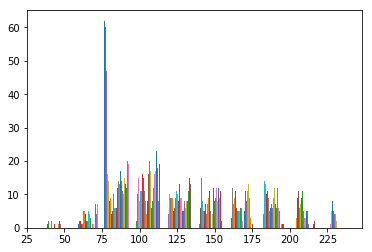

In [38]:
plt.hist(x_train[0])

# Potrebna normalizacija

In [0]:
x_train = x_train / 255
x_test = x_test / 255

In [0]:
x_train = np.expand_dims(x_train, axis = 3)

In [0]:
image_shape = x_train[0].shape

In [0]:
network = Sequential()
network.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=image_shape))
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=image_shape))
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Conv2D(filters=64, kernel_size=(3,3), padding='same'))
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Conv2D(filters=64, kernel_size=(3,3), padding='same'))
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Conv2D(filters=128, kernel_size=(3,3), padding='same'))
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Conv2D(filters=128, kernel_size=(3,3), padding='same'))
network.add(MaxPooling2D(pool_size=(1,1)))
network.add(Conv2D(filters=256, kernel_size=(3,3), padding='same'))
network.add(MaxPooling2D(pool_size=(1,1)))
network.add(Conv2D(filters=256, kernel_size=(3,3), padding='same'))
network.add(MaxPooling2D(pool_size=(1,1)))
network.add(Conv2D(filters=512, kernel_size=(3,3), padding='same'))
network.add(MaxPooling2D(pool_size=(1,1)))
network.add(Conv2D(filters=512, kernel_size=(3,3), padding='same'))
network.add(MaxPooling2D(pool_size=(1,1)))
network.add(Conv2D(filters=1024, kernel_size=(3,3), padding='same'))
network.add(MaxPooling2D(pool_size=(1,1)))
network.add(Conv2D(filters=1024, kernel_size=(3,3), padding='same'))
network.add(MaxPooling2D(pool_size=(1,1)))
network.add(Conv2D(filters=1024, kernel_size=(3,3), padding='same'))
network.add(MaxPooling2D(pool_size=(1,1)))
network.add(Conv2D(filters=1024, kernel_size=(3,3), padding='same'))
network.add(MaxPooling2D(pool_size=(1,1)))
network.add(Flatten())
network.add(Dense(units=1024, activation='relu'))
network.add(Dense(units=len(persons), activation='softmax'))

In [0]:
network.compile(optimizer='adam', loss = losses.categorical_hinge, metrics=['acc'])

In [44]:
print(x_train.shape)
print(y_train.shape)

(2025, 62, 47, 1)
(2025,)


In [0]:
def one_hot(y, C):
    y_one_hot = np.zeros((y.shape[0], C))

    for i in range(y.shape[0]):
        y_one_hot[i][int(y[i])] = 1
    
    return y_one_hot

In [0]:
y_train = one_hot(y_train, len(persons))

In [47]:
print(y_train.shape)
print(x_train.shape)

(2025, 62)
(2025, 62, 47, 1)


In [48]:
history = network.fit(x_train, y_train, batch_size=64, epochs=20, verbose=1)

Epoch 1/20
2025/2025 [==============================] - 397s 196ms/step - loss: 1.0006 - acc: 0.0519
Epoch 2/20
2025/2025 [==============================] - 375s 185ms/step - loss: 1.0010 - acc: 0.0365
Epoch 3/20
2025/2025 [==============================] - 390s 192ms/step - loss: 1.0006 - acc: 0.0390
Epoch 4/20
2025/2025 [==============================] - 393s 194ms/step - loss: 1.0002 - acc: 0.0444
Epoch 5/20
2025/2025 [==============================] - 386s 190ms/step - loss: 1.0001 - acc: 0.0612
Epoch 6/20
2025/2025 [==============================] - 407s 201ms/step - loss: 1.0001 - acc: 0.0588
Epoch 7/20
2025/2025 [==============================] - 403s 199ms/step - loss: 1.0001 - acc: 0.0464
Epoch 8/20
2025/2025 [==============================] - 402s 199ms/step - loss: 1.0001 - acc: 0.0425
Epoch 9/20
2025/2025 [==============================] - 406s 201ms/step - loss: 1.0001 - acc: 0.0479
Epoch 10/20
2025/2025 [==============================] - 420s 207ms/step - loss: 1.0001 - a

In [24]:
shape = x_test.shape
print(shape)

(998, 62, 47)


In [25]:
y_test = one_hot(y_test, len(persons))
print(y_test.shape)

(998, 62)


In [26]:
print(y_test[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [27]:
network.evaluate(x_test.reshape(998, 62, 47, 1), y_test)

998/998 [==============================] - 3s 3ms/step


[1.0000469030024772, 0.017034068136272545]